In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data = pd.read_html('https://www.fdic.gov/bank/individual/failed/banklist.html')

In [3]:
type(data)

list

In [140]:
data[0].tail()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
550,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB","July 27, 2001","August 19, 2014"
551,Malta National Bank,Malta,OH,6629,North Valley Bank,"May 3, 2001","November 18, 2002"
552,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,"February 2, 2001","February 18, 2003"
553,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,"December 14, 2000","March 17, 2005"
554,Bank of Honolulu,Honolulu,HI,21029,Bank of the Orient,"October 13, 2000","March 17, 2005"


In [7]:
data[0].columns

Index(['Bank Name', 'City', 'ST', 'CERT', 'Acquiring Institution',
       'Closing Date', 'Updated Date'],
      dtype='object')

In [133]:
city_state_data = data[0].pivot_table('City',index = ['ST'],aggfunc = 'count')
city_state_data.reset_index(level=city_state_data.index.names,inplace=True) #convert index to column
city_state_data.head()

,ST,City
0,AL,7
1,AR,4
2,AZ,16
3,CA,41
4,CO,10


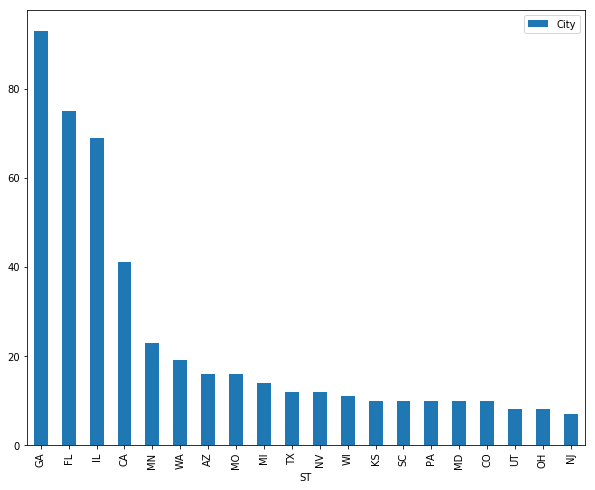

In [124]:
city_state_data.sort_values('City',ascending=False).head(20).plot(kind='bar', figsize=(10,8))

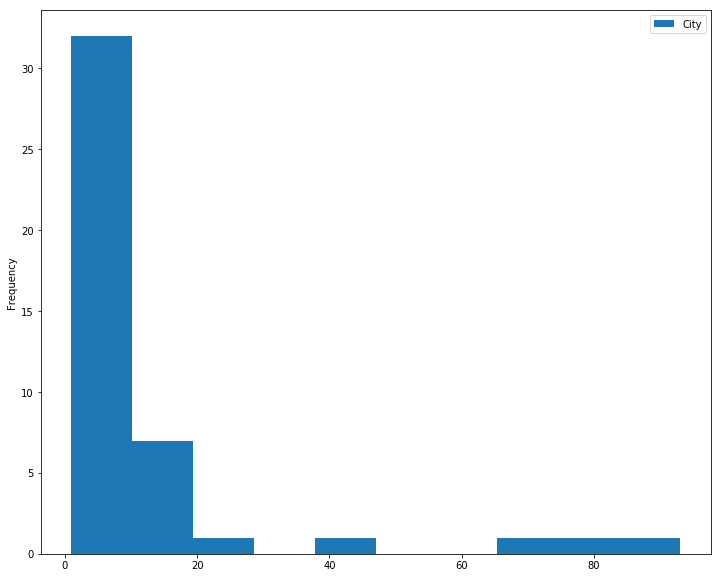

In [27]:
city_state_data.plot(kind='hist',figsize=(12,10))

In [29]:
region_state = pd.read_html('https://github.com/cphalpert/census-regions/blob/master/us%20census%20bureau%20regions%20and%20divisions.csv')

In [31]:
region_state[0].head()

,Unnamed: 0,State,State Code,Region,Division
0,NaN,Alaska,AK,West,Pacific
1,NaN,Alabama,AL,South,East South Central
2,NaN,Arkansas,AR,South,West South Central
3,NaN,Arizona,AZ,West,Mountain
4,NaN,California,CA,West,Pacific


In [96]:
reg_state = region_state[0]
reg_state.columns

Index(['Unnamed: 0', 'State', 'State Code', 'Region', 'Division'], dtype='object')

In [116]:
reg_state = reg_state.rename(columns={'State Code':'ST'},) #rename column to match
reg_state.head()

,Unnamed: 0,State,ST,Region,Division
0,NaN,Alaska,AK,West,Pacific
1,NaN,Alabama,AL,South,East South Central
2,NaN,Arkansas,AR,South,West South Central
3,NaN,Arizona,AZ,West,Mountain
4,NaN,California,CA,West,Pacific


In [134]:
new_data = pd.merge(city_state_data, reg_state,how='left',left_on='ST',right_on='ST') #vlookup match columns

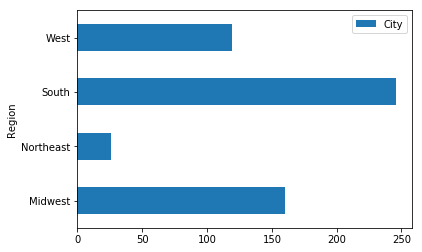

In [161]:
new_data.pivot_table('City',index='Region',aggfunc='sum').plot(kind='barh')